## Supervisado 1
### EJEMPLO 7

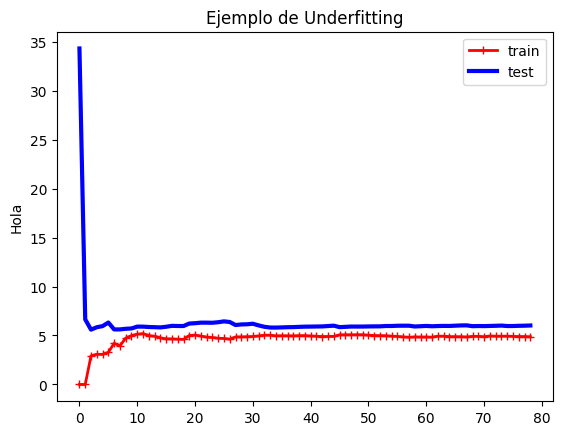

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def plot_curvas_entrenamiento(modelo, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errores, test_errores = [], []
    for n in range(1, len(X_train)):
        modelo.fit(X_train[:n], y_train[:n])
        y_train_predicciones = modelo.predict(X_train[:n])
        y_prediccion = modelo.predict(X_test)
        train_errores.append(mean_squared_error(y_train[:n], y_train_predicciones))
        test_errores.append(mean_squared_error(y_test, y_prediccion))
    plt.plot(np.sqrt(train_errores), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errores), "b-", linewidth=3, label="test")
    plt.legend()
#Si generamos datos que sigan una parábola e intentamos describirlos con un modelo lineal el
#resultado no será bueno. Vamos a intentar detectar esta situación con curvas de aprendizaje:


 
m = 100
X = 6 * np.random.rand(m, 1)
y = 2* X**2 + 0.5
reg_lin = LinearRegression()
plot_curvas_entrenamiento(reg_lin, X, y)
plt.title('Ejemplo de Underfitting')
plt.ylabel('Hola')

plt.show()

Como podemos observar hay underfitting

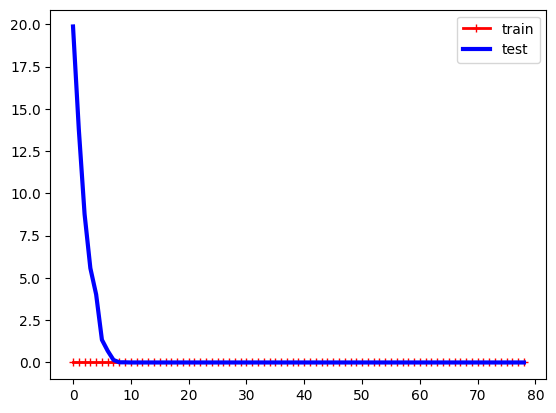

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
reg_poli = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_curvas_entrenamiento(reg_poli, X, y)
plt.show()